---
layout: default
title: "Neural Networks - Model Representation"
categories: neuralNetwork
permalink: /ML13/
order: 13
---

In [18]:
%pylab --no-import-all inline
from draw_neural_net import draw_neural_net

Populating the interactive namespace from numpy and matplotlib


# Model Representation of Neural Network
Anatomical neurons are cells that are present in the brain in millions. A neuron has a cell body, a number of input wires, called *dendrites* and an output wire called *axon*.

![neuron](data/img/neuron.png)

In a simplistic way a neuron is a computational unit that receive some input via dendrites, does some computation and then outputs something via the axon to other neurons in the brain.

A neuron implemented on the computer has a very simple model that mimics the architecture of an anatomical neuron. We're a going to model a neuron as just a logistic unit. The yellow node represents the *body* of the neuron, which is fed input through its *dendrites*, and produces an output $h_\theta(x)$ that is produced by the neuron body, though its **activation function** and transported forward by the neuron *axon*. Where $h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$

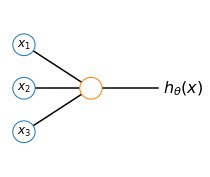

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
nodelabels=["$x_1$", "$x_2$", "$x_3$"]
colors=['C0', 'C0', 'C0', 'C1']
draw_neural_net(ax, .1, .9, .1, .9, [3, 1], output='$h_\\theta(x)$', node_labels=nodelabels, colors=colors)

A simpler representation is sometimes used to depict a neural network

$$
[x_0x_1x_2x_3]\to[]\to h_\theta(x)
$$

Sometimes when representing the inputs of a neuron the $x_0$, which is sometimes called the bias unit (since $x_0=1$), might be added if it convenient for the discussion of the model.

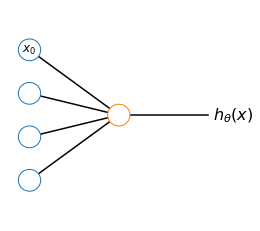

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
nodelabels=["$x_0$"]
colors=['C0', 'C0', 'C0', 'C0', 'C1']
draw_neural_net(ax, .1, .9, .1, .9, [4, 1], output='$h_\\theta(x)$', node_labels=nodelabels, colors=colors)

In neural networks the parameters $\theta$ of the model are sometimes called **weights**.

Until now we represented single neurons; a neural network is a group of different neurons connected together. The input nodes are grouped in what is called the **input layer**, which is always the first layer of the neural network. The final layer is called the **output layer**, since it computes the final value of our hypothesis. And all layers in between the input and the output layers are called **hidden layers**. They are called hidden layers because we can't observes the values computed by these nodes.

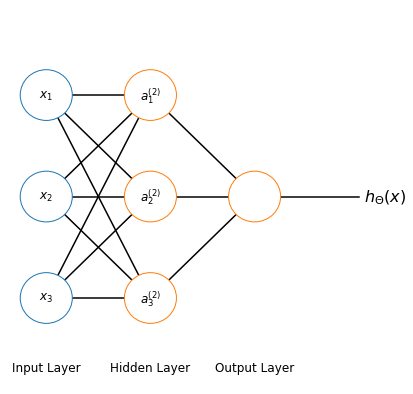

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
nodelabels=["$x_1$", "$x_2$", "$x_3$", "$a_1^{(2)}$", "$a_2^{(2)}$", "$a_3^{(2)}$"]
colors=['C0', 'C0', 'C0', 'C1', 'C1', 'C1', 'C1']
layers = ['Input Layer', 'Hidden Layer', 'Output Layer']
draw_neural_net(ax, .1, .9, .1, .9, [3, 3, 1], output='$h_\\Theta(x)$', node_labels=nodelabels, colors=colors, layer_labels=layers)


The computational entities in a neural networks are:

* $a_i^{(j)}$  activation neuron/unit $i$ in layer $j$
* $\Theta^{(j)}$ matrix of weights controlling the function mapping from layer $j$ to layer $j+1$ 

And the computation in the network

$$
[x_0x_1x_2x_3]\to \left[a_1^{(2)}a_2^{(2)}a_3^{(2)} \right]\to h_\Theta(x)
$$

depicted in the figure above, is

$$
\begin{align}
& a_1^{(2)} = g \left(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3\right) \\
& a_2^{(2)} = g \left(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3\right) \\
& a_3^{(2)} = g \left(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3\right)
\end{align}
\label{eq:neuralnet} \tag{1}
$$


$$
h_\Theta(x)= a_1^{(3)} =  \left(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(1)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}\right)
\label{eq:neuralnet_h} \tag{2}
$$

So in this network we have 3 input units and 3 hidden units and so the dimension of $\Theta^{(1)}$, which is the matrix of parameters weighting the values from the 3 input units from the 3 hidden units is going to be $\Theta^{(1)} \in \mathbb{R} ^{3\times4}$.

In general if a network has $s_j$ units in layer $j$, $s_{j+1}$ units in layer $j+1$, then $\Theta^{(j)}$ will be of dimension $s_{j+1} \times (s_j+1)$

# Forward propagation

Let's rewrite the argument of the functions $g$ in $\eqref{eq:neuralnet}$ as $z^{(j)}$ so that now we have

$$
\begin{align}
& a_1^{(2)} = g \left(z_1^{(2)}\right) \\
& a_2^{(2)} = g \left(z_2^{(2)}\right) \\
& a_3^{(2)} = g \left(z_3^{(2)}\right)
\end{align}
$$

Looking at $\eqref{eq:neuralnet}$ again, we can see that the way the arguments of $g$ in $a_1^{(2)}, a_2^{(2)}, a_2^{(2)}$ are disposed can be written as $\Theta^{(1)}x$, where $x$ is a vector of inputs.

$$
\begin{split}
x=
\begin{bmatrix}
x_0\\
x_1\\
x_2\\
x_3
\end{bmatrix}
\end{split}
\quad\quad\quad
\begin{split}
z^{(2)}=
\begin{bmatrix}
z_1^{(2)}\\
z_2^{(2)}\\
z_3^{(2)}
\end{bmatrix}
\end{split}
$$

$$
\begin{align}
&z^{(2)}=\Theta^{(1)}x \\
&a^{(2)}=g\left(z^{(2)}\right)
\end{align}
$$

Where $a^{(2)}$ and $z^{(2)}$ are $\mathbb{R}^3$ vectors. Now we could say that the input layer is also an activation layer and call it $a^{(1)}$ so that

$$
z^{(2)}=\Theta^{(1)}a^{(1)}
$$

What we have written so far give us the value for $ a^{(2)}_1, a^{(2)}_2, a^{(2)}_3 $.

If we look at $ \eqref{eq:neuralnet_h} $ we see that we need one more value, the bias unit $a^{(2)}_{0} = 1$ that we need to add to $a^{(2)}$, which becomes a $\mathbb{R}^4$ vector

$$
a^{(2)}=
\begin{bmatrix}
a_0^{(2)}\\
a_1^{(2)}\\
a_2^{(2)}\\
a_3^{(2)}
\end{bmatrix}
$$

We can now compute $h_\Theta(x)$ $\eqref{eq:neuralnet_h}$

$$
\begin{align}
&z^{(3)}=\Theta^{(2)}a^{(2)} \\
&h_\Theta(x)=a^{(3)} = g\left(z^{(3)}\right)
\end{align}
$$

or more generally

$$
\begin{align}
&z^{(j+1)}=\Theta^{(j)}a^{(j)} \\
&h_\Theta(x)=a^{(j+1)} = g\left(z^{(j+1)}\right)
\end{align}
$$


This process is called **forward propagation**

# Neural networks learn its own features
Let's take the network used as example above and focus on the last two layers

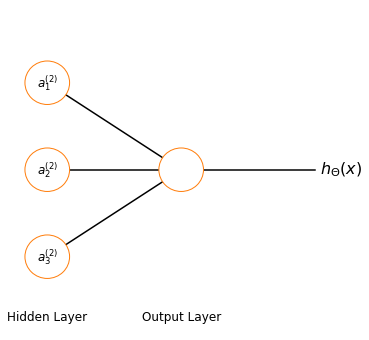

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
nodelabels=["$a_1^{(2)}$", "$a_2^{(2)}$", "$a_3^{(2)}$"]
colors=['C1', 'C1', 'C1', 'C1']
layers = ['Hidden Layer', 'Output Layer']
draw_neural_net(ax, .1, .9, .1, .9, [3, 1], output='$h_\\Theta(x)$', node_labels=nodelabels, colors=colors, layer_labels=layers)

What is left in this neural network is simply logistic regeression, where we use the output unit (or logistic regression unit) to build the hypothesis $h_\Theta(x)$

$$
h_\Theta(x) = g\left(\Theta_{10}^{(2)}a_0^{(2)}+\Theta_{11}^{(2)}a_1^{(2)}+\Theta_{12}^{(2)}a_2^{(2)}+ \Theta_{13}^{(2)}a_3^{(2)} \right)
$$

Where the features fed into logistic regression are the values in $a^{(2)}$. And here resides the fundamental difference between neural networks and logistic regression: the features $a^{(2)}$ they themselves are learned as functions of the input $x$ with some other set of parameters $\Theta^{(1)}$

The neural network, instead of being constrained to feed the features $x$ to logistic regression, learns its own features $a^{(2)}$ to feed into logistic regression. Depending on the parameters $\Theta^{(1)}$, it can learn some complex features and result in a better hypothesis that you could have if you were constrained to use features $x$ or even if you had to manually set some higher order polynomial features combining the features $x$.

Neural networks can have different number and dimension of hidden layers and the way a neural network is connected is called its **architecture**.

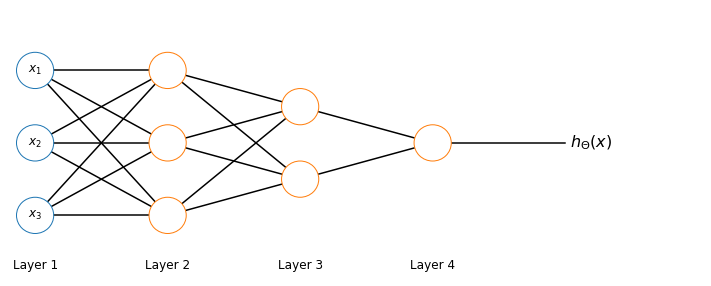

In [17]:
fig, ax = plt.subplots(figsize=(12.5, 5))
nodelabels=["$x_1$", "$x_2$", "$x_3$"]
colors=['C0'] * 3 + ['C1']* 6
draw_neural_net(ax, .1, 2, .1, .9, [3, 3, 2, 1], output='$h_\\Theta(x)$', node_labels=nodelabels, colors=colors, layer_labels=True)
ax.set_xlim(0, 2.5);